In [184]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Task 1: Loading and Inspecting the Data

We will be working with a dataset of audiobooks downloaded from audible.in from 1998 to 2025 (pre-planned releases). [Source](https://www.kaggle.com/datasets/snehangsude/audible-dataset)

The first thing we will do is load the raw audible data.

### Instructions:
* Using pandas, read the `audible_raw.csv` file that is located inside the `data` folder in our local directory. Assign to `audible`.
* Show the first few rows of the `audible` data frame.

In [185]:
# Load the audible_raw.csv file
df = pd.read_csv('data/audible_raw.csv')
# View the first rows of the dataframe
df.head()

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00


### 💾 The data

- "name" - The name of the audiobook.
- "author" - The audiobook's author.
- "narrator" - The audiobook's narrator.
- "time" -  The audiobook's duration, in hours and minutes.
- "releasedate" -  The date the audiobook was published.
- "language" -  The audiobook's language.
- "stars" -  The average number of stars (out of 5) and the number of ratings (if available).
- "price" -  The audiobook's price in INR (Indian Rupee).

 We can use the `.info()` method to inspect the data types of the columns

In [186]:
# Inspect the columns' data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         87489 non-null  object
 1   author       87489 non-null  object
 2   narrator     87489 non-null  object
 3   time         87489 non-null  object
 4   releasedate  87489 non-null  object
 5   language     87489 non-null  object
 6   stars        87489 non-null  object
 7   price        87489 non-null  object
dtypes: object(8)
memory usage: 5.3+ MB


## Task 2: Clean text data in Author and Narrator columns

We will start cleaning some of the text columns like `author` and `narrator`. We can remove the `Writtenby:` and `Narratedby:` portions of the text in those columns.

For this, we will use the `.str.replace()` method

### Instructions:
* Remove 'Writtenby:' from the `author` column
* Remove 'Narratedby:' from the `narrator` column
* Check the results

In [187]:
# Remove Writtenby: from the author column
df.author = df.author.str.replace('Writtenby:','')
# Remove Narratedby: from the narrator column
df.narrator = df.narrator.str.replace('Narratedby:','')

# Check the results
df.head()

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,JeffKinney,DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00


## Task 3: Extract number of stars and ratings from Stars column.

The `stars` column combines the number of stars and the number of ratins. Let's turn this into numbers and split it into two columns: `rating_stars` and `n_ratings`.

First we will use the `.sample()` method to get a glimpse at the type of entries in that column.

In [188]:
# Get a glimpse of the stars column
df.stars.sample(n=30)

28534               Not rated yet
78267               Not rated yet
86392               Not rated yet
70762               Not rated yet
84315               Not rated yet
69461               Not rated yet
30343               Not rated yet
75299               Not rated yet
25220               Not rated yet
56249    3 out of 5 stars1 rating
14729    5 out of 5 stars1 rating
86038               Not rated yet
37205               Not rated yet
2410     4 out of 5 stars1 rating
41013               Not rated yet
20970               Not rated yet
38792               Not rated yet
81755               Not rated yet
20662               Not rated yet
6861                Not rated yet
44816               Not rated yet
1521                Not rated yet
42008               Not rated yet
34370               Not rated yet
7488                Not rated yet
44577               Not rated yet
33727               Not rated yet
37942               Not rated yet
76995               Not rated yet
66039         

Since there are many instances of `Not rated yet`, let's filter them out and sample again:

In [189]:
# Explore the values of the star column that are not 'Not rated yet'
df[~(df.stars=="Not rated yet")].sample(30)

,name,author,narrator,time,releasedate,language,stars,price
2715,If You're Happy and You Know It,AnnaMcQuinn,SusanReed,7 mins,07-01-10,English,4 out of 5 stars1 rating,398.00
80537,Dune: The Lady of Caladan,"BrianHerbert,KevinJ.Anderson",ScottBrick,19 hrs and 36 mins,02-11-21,English,5 out of 5 stars1 rating,793.00
14607,Two-Dimensional Man,PaulSahre,PaulSahre,7 hrs and 8 mins,02-11-18,English,4 out of 5 stars1 rating,879.00
64233,The Third Jesus,DeepakChopra,ShishirKurup,9 hrs and 17 mins,19-02-08,English,4 out of 5 stars1 rating,703.00
11148,Monolith to Microservices,SamNewman,MitchellDorian,6 hrs and 45 mins,27-02-21,English,4.5 out of 5 stars16 ratings,"1,340.00"
27361,HBR's 10 Must Reads on Strategy,"HarvardBusinessReview,MichaelE.Porter,W.ChanKim,",PaulMcLain,9 hrs and 17 mins,04-08-15,English,4.5 out of 5 stars24 ratings,668.00
51376,Behind Her Eyes,SarahPinborough,"AnnaBentinck,JosieDunn,BeaHolland,",11 hrs and 55 mins,26-01-17,English,4.5 out of 5 stars15 ratings,491.00
54963,Brick Lane,MonicaAli,MeeraSyal,15 hrs and 19 mins,01-11-12,English,4 out of 5 stars3 ratings,827.00
107,Billionaire Boy,DavidWalliams,"DavidWalliams,NitinGanatra",3 hrs and 8 mins,09-06-11,English,5 out of 5 stars1 rating,266.00
72519,Red's Alphas: A Fairytale Retelling Reverse Harem,"M.H.Soars,MichelleHercules","TristanJames,VirginiaRose",7 hrs and 15 mins,18-12-18,English,5 out of 5 stars1 rating,586.00


As a first step, we can replace the instances of `Not rated yet` with `NaN`

In [190]:
# Replace 'Not rated yet' with NaN
df.stars = df.stars.replace("Not rated yet",np.nan)

In [191]:
df.head()

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,JeffKinney,DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00


We can use `.str.extract()` to get the number of stars and the number of ratings into their own columns.

### Instructions:
* Extract the number of stars into the `rating_stars` column
* Extract the number of ratings into the `n_ratings` column
* Convert both new columns to float

In [192]:
# Regular Expression to Extract Rating, Stars, and Number of Ratings
df['rating_stars'] = df['stars'].str.extract(r'(\d\.\d) out of 5 stars').astype(float)
df['n_ratings'] = df['stars'].str.extract(r'(\d+(?:,\d+)*) ratings').replace({',': ''}, regex=True).astype(float)

# Examine the new rating_stars and n_ratings columns
df[['rating_stars', 'n_ratings']].head()

,rating_stars,n_ratings
0,NaN,34.0
1,4.5,41.0
2,4.5,38.0
3,4.5,12.0
4,4.5,181.0


In [193]:
df.n_ratings.sample(20)

22220    NaN
67789    NaN
41361    5.0
86113    NaN
34937    NaN
84738    NaN
111      NaN
9139     NaN
70151    NaN
75232    NaN
38882    NaN
62972    NaN
12652    5.0
75125    NaN
16019    NaN
69400    NaN
18241    NaN
32660    3.0
64217    2.0
41417    NaN
Name: n_ratings, dtype: float64

As a last step, let's delete the `stars` column using the `.drop` command:

In [194]:
# Drop the stars column
df.drop(columns='stars', inplace=True)
# Check the results
df.columns

Index(['name', 'author', 'narrator', 'time', 'releasedate', 'language',
       'price', 'rating_stars', 'n_ratings'],
      dtype='object')

## Task 4: Change data types

Another important step is to have our data in the correct data types

### Instructions:
* Set `price` to float
* Turn `rating_stars` to category
* Convert `releasedate` to datetime

In [195]:
df.price = df.price.str.replace(',','')

In [196]:
# Explore the price column
df.price = df[df.price.str.contains('Free',regex=False)].price.map({'Free':'0'})

We need to get rid of the comma and the word 'Free' before we can convert the data.

In [197]:

# Turn price to float
df.price = df.price.astype(float)

* Turn `rating_stars` to category

Since `stars` can only take a small number of discrete values, the best data type for the column is `category`.

Let's first look at the unique values in that column to confirm:

In [198]:
# Look at the unique values in the rating_stars column
df.rating_stars.unique()

array([nan, 4.5, 3.5, 2.5, 1.5])

We can now use `.astype` to change the data type.

In [199]:
# Turn rating_stars to category
df.rating_stars = df.rating_stars.astype('category')

* Convert `releasedate` date to datetime

Here we will use the `to_datetime()` function to turn the dates into datetime objects:

In [200]:
# Convert releasedate to datetime
df.releasedate = pd.to_datetime(df.releasedate,errors='coerce')
# Inspect the dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          87489 non-null  object        
 1   author        87489 non-null  object        
 2   narrator      87489 non-null  object        
 3   time          87489 non-null  object        
 4   releasedate   87489 non-null  datetime64[ns]
 5   language      87489 non-null  object        
 6   price         338 non-null    float64       
 7   rating_stars  4514 non-null   category      
 8   n_ratings     9250 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(2), object(5)
memory usage: 5.4+ MB


## Task 5: Extract hours and minutes from the `time` column

The `time` column combines the number of hours and minutes into one column. We want to transform and consolidate the information into a new `time_minutes` column.

In [201]:
# Explore the values in the time column
df.time.head()

0     2 hrs and 20 mins
1     13 hrs and 8 mins
2      2 hrs and 3 mins
3    11 hrs and 16 mins
4                10 hrs
Name: time, dtype: object

Let's see what other ways they have encoded `min` or `minutes`:

In [202]:
# Search the entries in the time column for different spellings of min. Let's try min, mins, minutes

# Search for rows with "min", "mins", or "minutes"
pattern = r'\b(?:min|mins|minutes)\b'
filtered_df = df[df['time'].str.contains(pattern, na=False, case=False)]

print(filtered_df.time)


0         2 hrs and 20 mins
1         13 hrs and 8 mins
2          2 hrs and 3 mins
3        11 hrs and 16 mins
5        10 hrs and 35 mins
                ...        
87484     7 hrs and 34 mins
87485     10 hrs and 7 mins
87486     19 hrs and 4 mins
87487      4 hrs and 8 mins
87488       6 hrs and 1 min
Name: time, Length: 86085, dtype: object


We can see that we need to fix the following:
* hr, hrs -> consolidate as `hr`
* min, mins -> consolidate as `min`
* Less than 1 minute -> round to 1 min

In [203]:
# Replace hrs, mins, and 'Less than 1 minute'
df['time'] = df['time'].str.replace('hrs', 'hr', case=False)
df['time'] = df['time'].str.replace('mins', 'min', case=False)
df['time'] = df['time'].str.replace('Less than 1 minute', '1 min', case=False)

Let's see how it looks now:

In [204]:
# Check the results
df.time.sample(30)

35614     2 hr and 17 min
80306    11 hr and 54 min
27620     2 hr and 15 min
41706     7 hr and 39 min
1203                1 min
45586      1 hr and 4 min
59556     3 hr and 16 min
50109     7 hr and 40 min
70924     8 hr and 14 min
26747    12 hr and 36 min
7762       2 hr and 4 min
22970      9 hr and 7 min
60098     7 hr and 57 min
51929     8 hr and 15 min
85317      4 hr and 5 min
39818     4 hr and 59 min
15251     3 hr and 58 min
45836     8 hr and 31 min
1494                9 min
80354     5 hr and 33 min
29757     2 hr and 12 min
14061     1 hr and 44 min
78874    13 hr and 29 min
43799     8 hr and 34 min
12211              35 min
33177      1 hr and 7 min
29349              34 min
7860      3 hr and 31 min
40516    10 hr and 48 min
28267     5 hr and 18 min
Name: time, dtype: object

The next step is to extract the number of hours and minutes from the text, then combine in a new `time_mins` column.

### Instructions: 
* Extract the number of hours from `time`. Assign to the `hours` variable.
* Extract the number of minutes from `time`. Assign to the `mins` variable.
* Create the `time_mins` column combining hours and minutes.

In [205]:
# Extract the number of hours, turn to integer
df[['hours','mins']] = df.time.str.split('and',expand=True)
# Extract the number of minutes, turn to integer

# Combine hours and minutes into the time_mins column
df['time_mins'] = df.hours + " " + df.mins
# Check the results
df.time_mins.head()

0     2 hr   20 min
1     13 hr   8 min
2      2 hr   3 min
3    11 hr   16 min
4               NaN
Name: time_mins, dtype: object

And as final step, let's delete the columns we don't need any more:

In [206]:
# Drop the time column
df.drop(columns='time', inplace=True)

Here is how our dataframe looks now:

In [207]:
# Inspect the dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          87489 non-null  object        
 1   author        87489 non-null  object        
 2   narrator      87489 non-null  object        
 3   releasedate   87489 non-null  datetime64[ns]
 4   language      87489 non-null  object        
 5   price         338 non-null    float64       
 6   rating_stars  4514 non-null   category      
 7   n_ratings     9250 non-null   float64       
 8   hours         87489 non-null  object        
 9   mins          72740 non-null  object        
 10  time_mins     72740 non-null  object        
dtypes: category(1), datetime64[ns](1), float64(2), object(7)
memory usage: 6.8+ MB


## Task 6: Check data ranges

Another important step is to confirm that the values in our columns are in the expected ranges and that we don't have out-of-range values.

Let's create a histogram of the numeric columns to visually inspect ht ranges and the shape of the distribution:

array([[<AxesSubplot: title={'center': 'price'}>,
        <AxesSubplot: title={'center': 'n_ratings'}>]], dtype=object)

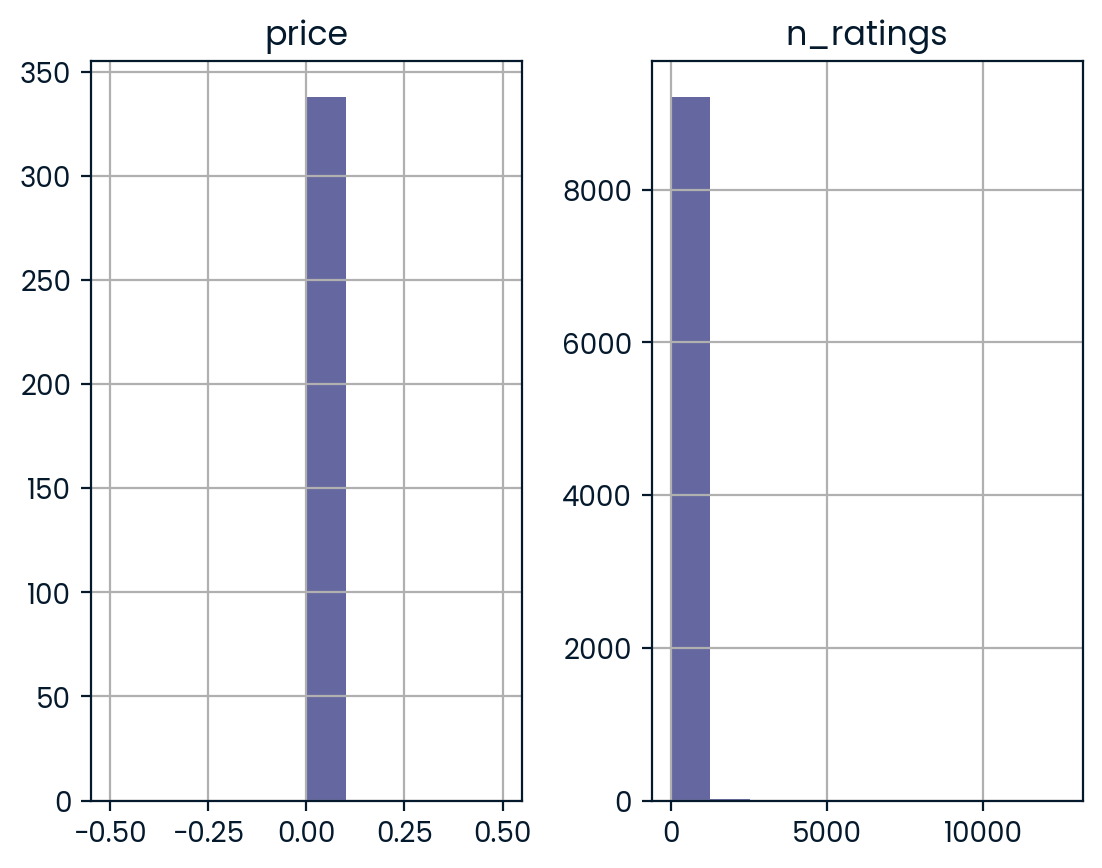

In [208]:
# Plot histograms of all the numerical columns
df[df.select_dtypes('number').columns.tolist()].hist()

Additionally, we can use `.describe()` to look at a summary of our data

In [209]:
# Look at the numeric columns
df.describe()

,price,n_ratings
count,338.0,9250.000000
mean,0.0,34.587243
std,0.0,264.025444
min,0.0,2.000000
25%,0.0,2.000000
50%,0.0,5.000000
75%,0.0,14.000000
max,0.0,12573.000000


In [210]:
# Look at the non numeric columns
df.describe(exclude=[np.number])

,name,author,narrator,releasedate,language,rating_stars,hours,mins,time_mins
count,87489,87489,87489,87489,87489,4514.0,87489,72740,72740
unique,82767,48374,29717,5058,36,4.0,187,59,2183
top,The Art of War,"矢島雅弘,石橋遊",anonymous,2018-05-16 00:00:00,English,4.5,7 hr,2 min,1 hr 2 min
freq,20,874,1034,773,61884,4046.0,6892,1402,213
first,NaN,NaN,NaN,1998-12-27 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2025-11-14 00:00:00,NaN,NaN,NaN,NaN,NaN


We will transform the prices in `price` to USD for this exercise. We can use the exchange rate of 1 USD = 0.012 INR:

In [211]:
# Transform prices to USD (multiply times 0.012)
df.price = df.price*0.012
# Check the results
df.price.sample(20)

86839   NaN
84351   NaN
56685   NaN
61390   NaN
56136   NaN
11205   NaN
13818   NaN
10567   NaN
76334   NaN
57986   NaN
276     NaN
8288    NaN
37672   NaN
25206   NaN
26403   NaN
24399   NaN
3199    NaN
70957   NaN
82970   NaN
25546   NaN
Name: price, dtype: float64

There values in the `language` column have different capitalization. Let's fix that.

In [212]:
# Inspect the language column before making changes
df.language.sample(20)

64600     german
42203    English
34949    English
898      English
62440    English
60253    English
8811      french
3786     English
18206     german
54904    English
2991     English
12029    russian
43507    English
20879    English
62334    English
81510    English
40971    English
42535    English
61019    English
81729    English
Name: language, dtype: object

In [216]:
# Update capitalization in the language column
#df.language.str.capitalize().sample(20)
# Check the results
df.language = df.language.str.capitalize()

## Task 7: Checking for duplicates

How many duplicates do we have?

As a first step look for duplicates using `.duplicated()` and `.sum()`:

In [217]:
# Look for duplicate rows
df.duplicated().sum()

3

It is useful to look for duplicates only using a subset of the columns that make sense. We will use the following subset of columns:
* name
* author
* narrator
* time_mins
* price

Here we use `.duplicated()` again, but with our subset of columns.

In [219]:
# Create a list of our subset columns and assign to subset_cols
subset_cols =['name','author','narrator','time_mins','price']
df.duplicated(subset=subset_cols).sum()


160

Let's look at those values (use `keep=false`) and see what is going on:

In [220]:
# Check the duplicated rows keeping the duplicates and order by the name column
df[df.duplicated(subset=subset_cols, keep=False)].sort_values('namee')

,name,author,narrator,releasedate,language,price,rating_stars,n_ratings,hours,mins,time_mins
63978,"""Das Böse ist des Menschen beste Kraft""",ChristianLiederer,ThomasKrause,2021-12-14,German,NaN,NaN,NaN,2 hr,24 min,2 hr 24 min
63965,"""Das Böse ist des Menschen beste Kraft""",ChristianLiederer,ThomasKrause,2021-12-23,German,NaN,NaN,NaN,2 hr,24 min,2 hr 24 min
64722,100 quotes by Benjamin Franklin,BenjaminFranklin,PaulSpera,2018-07-03,English,NaN,NaN,2.0,19 min,None,NaN
22306,100 quotes by Benjamin Franklin,BenjaminFranklin,PaulSpera,2018-07-03,English,NaN,NaN,2.0,19 min,None,NaN
24625,90 Minutes in Heaven,"DonPiper,CecilMurphey",DonPiper,2015-09-25,English,NaN,NaN,NaN,8 hr,15 min,8 hr 15 min
...,...,...,...,...,...,...,...,...,...,...,...
68810,ダイエット瞑想,志麻絹依,志麻絹依,2015-01-09,Japanese,NaN,NaN,NaN,23 min,None,NaN
68897,寝たまんまヨガＣＤブック,"今津貴美,スタジオ・ヨギー",今津貴美,2017-09-13,Japanese,NaN,NaN,NaN,38 min,None,NaN
68851,寝たまんまヨガＣＤブック,"今津貴美,スタジオ・ヨギー",今津貴美,2017-09-13,Japanese,NaN,NaN,NaN,27 min,None,NaN
55504,芋虫,江戸川乱歩,鬼城院護,2022-03-31,Japanese,NaN,NaN,NaN,53 min,None,NaN


We can see that the duplicates are for files with different release dates. We can decide to keep the record with the last release date.

We will can use the `drop_duplicates()` method with the same subset and using `keep=last` to keep the last release date

In [222]:
# Drop duplicated rows keeping the last release date
df.drop_duplicates(subset=subset_cols,keep='last', inplace=True)

We can check again for duplicates:

In [223]:
# Check again for duplicates using our subset of columns
df.duplicated().sum()

0

## Task 8: Dealing with missing data

Before we finish, let's take a look at missing data in our columns. We can use the `.isna()` method and chain it with `.sum()` to get the total:

In [225]:
# Check for null values
df.isna().sum()

name                0
author              0
narrator            0
releasedate         0
language            0
price           86991
rating_stars    82853
n_ratings       78135
hours               0
mins            14692
time_mins       14692
dtype: int64

We could turn the **NaN** values to 0 or another numeric value, or we could keep them. It depends on our use case.

If we want to plot the ratings distribution, it can make sense to drop audiobooks with no ratings. But if we need to use the distribution of prices for our analysis, then removing audiobooks with no ratings will bias our results (since unrated audiobooks are likely more niche and might have a different pricing structure than rated audiobooks).

We will keep the unrated audiobooks for now.

## Task 9: Save the cleaned data set

We can use the `.to_csv` method to save the clean file. We include `index=False` so that we don't also copy the current index to our destination file.

In [227]:
# Save the dataframe to a new file: 'audible_clean.csv'
df.to_csv('audible_cleaned.csv',index=False)